In [1]:

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
file_path = "CarPrice_Assignment.csv"
df = pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
missing_values = df.isnull().sum()
missing_values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(" ")[0].lower())

In [6]:

df.drop(columns=['CarName', 'car_ID'], inplace=True)

In [7]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation', 'enginetype', 
                    'cylindernumber', 'fuelsystem', 'CarBrand']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


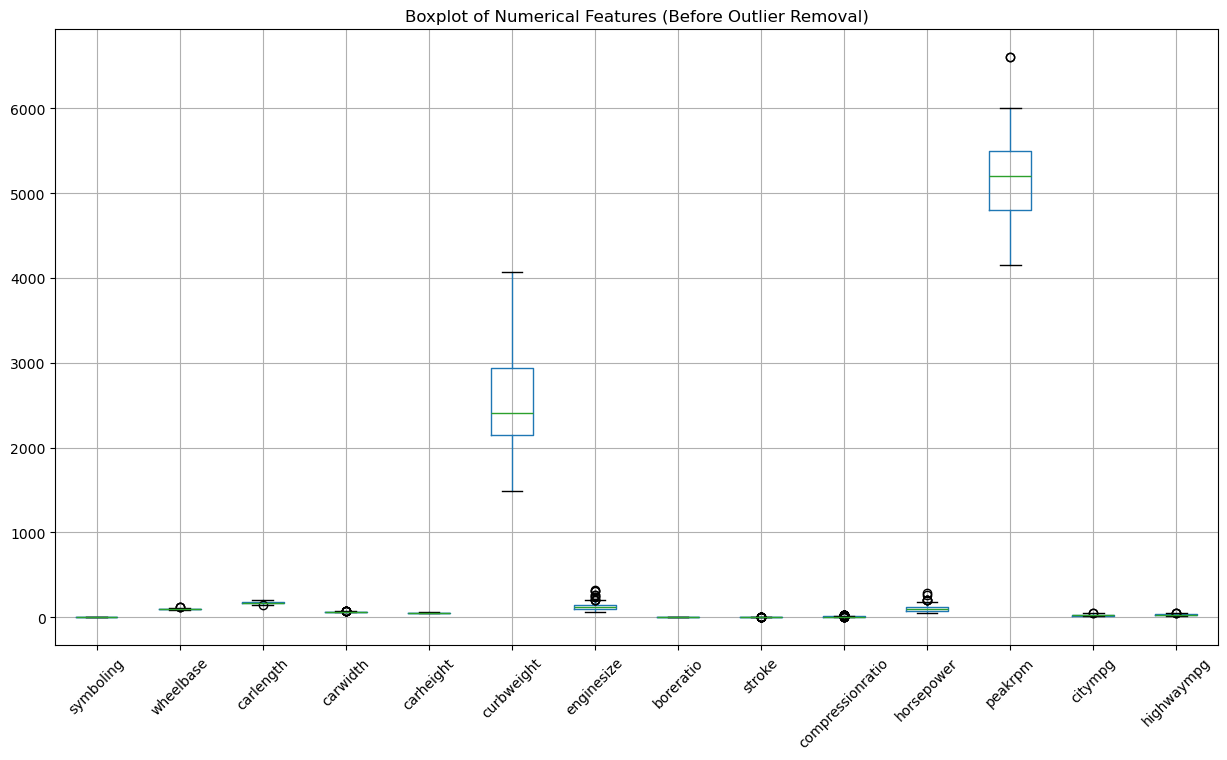


Number of Outliers in Each Feature Before Removal:
symboling            0
wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
boreratio            0
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
dtype: int64

Original dataset size: 205
Dataset size after removing outliers: 139


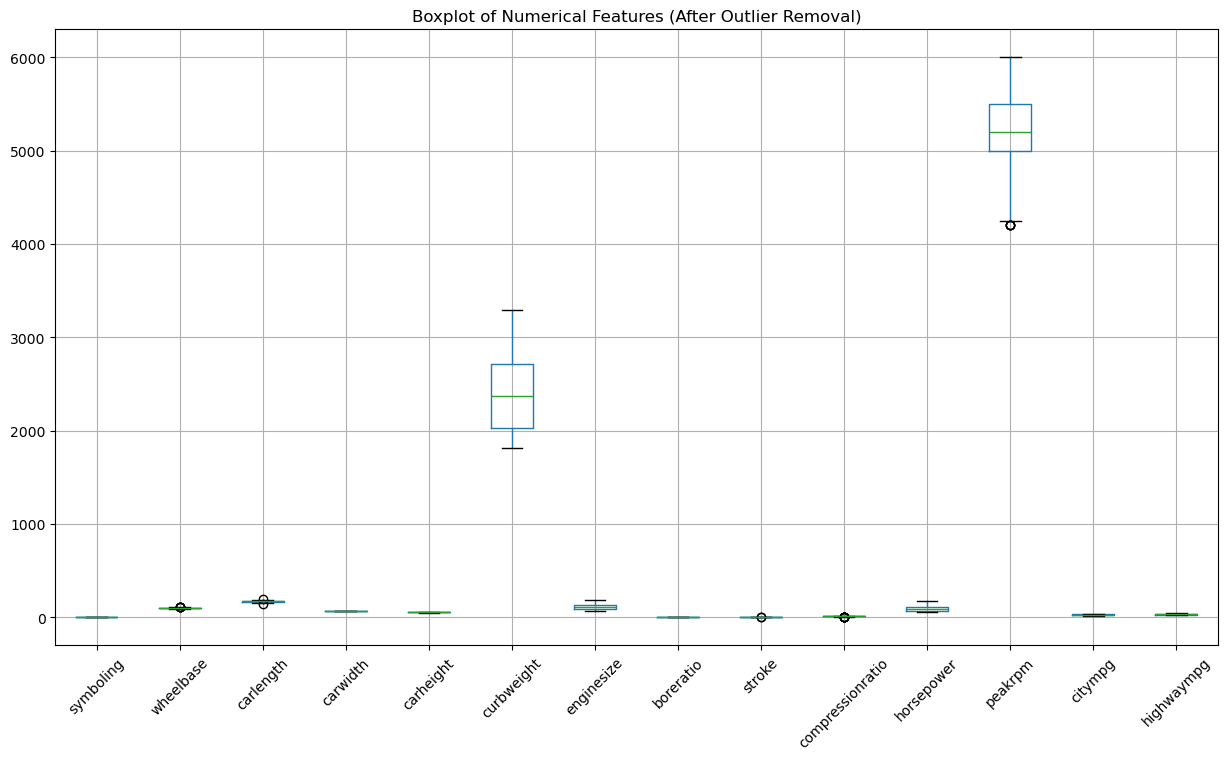

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove("price") 

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (Before Outlier Removal)")
plt.show()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print("\nNumber of Outliers in Each Feature Before Removal:")
print(outliers)

df_cleaned = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

print(f"\nOriginal dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_cleaned.shape[0]}")

plt.figure(figsize=(15, 8))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (After Outlier Removal)")
plt.show()


In [9]:
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')
}

results = []

In [12]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, mse, mae])

results_df = pd.DataFrame(results, columns=["Model", "R-squared", "MSE", "MAE"])
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                      Model  R-squared           MSE          MAE
0         Linear Regression   0.104121  1.673578e+07  2295.167337
1             Decision Tree   0.733091  4.986089e+06  1520.107143
2             Random Forest   0.827741  3.217939e+06  1178.665119
3         Gradient Boosting   0.821569  3.333244e+06  1169.441386
4  Support Vector Regressor   0.053004  1.769068e+07  3131.441669


Random Forest Regressor performed the best with the highest R² (0.827) and lowest MSE.
Gradient Boosting is the second-best model.
Linear Regression performed decently but is outperformed by tree-based models.
Decision Tree had lower performance than Random Forest due to overfitting tendencies.
Support Vector Regressor (SVR) performed the worst, with a lower R² and high errors.

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

top_features = feature_importance_df.head(15)
print("\nTop 15 Important Features:")
print(top_features)


Top 15 Important Features:
             Feature  Importance
13        highwaympg    0.619258
12           citympg    0.086210
10        horsepower    0.072315
5         curbweight    0.054390
11           peakrpm    0.023836
3           carwidth    0.022675
1          wheelbase    0.018691
2          carlength    0.018553
8             stroke    0.014985
6         enginesize    0.013951
4          carheight    0.008048
44      CarBrand_bmw    0.005975
9   compressionratio    0.005898
15  aspiration_turbo    0.005836
7          boreratio    0.005561


In [14]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  
    n_jobs=-1,  
    scoring='r2', 
)

grid_search_rf.fit(X_train_scaled, y_train)

best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)

best_rf_r2 = r2_score(y_test, y_pred_rf)
best_rf_mse = mean_squared_error(y_test, y_pred_rf)
best_rf_mae = mean_absolute_error(y_test, y_pred_rf)

best_model_results = {
    "Best Random Forest Model": {
        "R2 Score": best_rf_r2,
        "MSE": best_rf_mse,
        "MAE": best_rf_mae,
        "Best Parameters": grid_search_rf.best_params_
    }
}

print("\nHyperparameter Tuning Results:")
print("Best Random Forest Model:")
print(best_model_results["Best Random Forest Model"])


Hyperparameter Tuning Results:
Best Random Forest Model:
{'R2 Score': 0.8285679108021385, 'MSE': 3202496.806531604, 'MAE': 1177.0805826247165, 'Best Parameters': {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}}


After performing hyperparameter tuning the performance of the model has slightly increased